In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import joblib as jb

In [111]:
data=pd.read_csv('crop data.csv')

In [112]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [114]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [115]:
data['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [67]:
data['District_Name'].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [116]:
data['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

# Handling Null Values

In [117]:
data.isnull().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [118]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [119]:
data = data.dropna(axis = 0)

In [120]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

## Converting Strings to Numeric Datatypes

In [121]:
sta_n=list(range(len(data["State_Name"].unique())))
dis_n=list(range(len(data["District_Name"].unique())))
se=list(range(len(data["Season"].unique())))
cr=list(range(len(data["Crop"].unique())))

In [123]:
data["State_Name"].replace(data["State_Name"].unique(),sta_n,inplace=True)
data["District_Name"].replace(data["District_Name"].unique(),dis_n,inplace=True)
data["Season"].replace(data["Season"].unique(),se,inplace=True)
data["Crop"].replace(data["Crop"].unique(),cr,inplace=True)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  int64  
 1   District_Name  242361 non-null  int64  
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  int64  
 4   Crop           242361 non-null  int64  
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 14.8 MB


In [125]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,0,2000,0,0,1254.0,2000.0
1,0,0,2000,0,1,2.0,1.0
2,0,0,2000,0,2,102.0,321.0
3,0,0,2000,1,3,176.0,641.0
4,0,0,2000,1,4,720.0,165.0
...,...,...,...,...,...,...,...
246086,32,645,2014,4,2,306.0,801.0
246087,32,645,2014,4,31,627.0,463.0
246088,32,645,2014,1,7,324.0,16250.0
246089,32,645,2014,5,2,279151.0,597899.0


## Remove Outliers

In [126]:
data=data[np.abs(data['Area']-data['Area'].mean()) / data['Area'].std() <1]
data=data[np.abs(data['Crop']-data['Crop'].mean()) / data['Crop'].std() <1]
data=data[np.abs(data['Production']-data['Production'].mean()) / data['Production'].std() <1]

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165521 entries, 7 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     165521 non-null  int64  
 1   District_Name  165521 non-null  int64  
 2   Crop_Year      165521 non-null  int64  
 3   Season         165521 non-null  int64  
 4   Crop           165521 non-null  int64  
 5   Area           165521 non-null  float64
 6   Production     165521 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 10.1 MB


<AxesSubplot:>

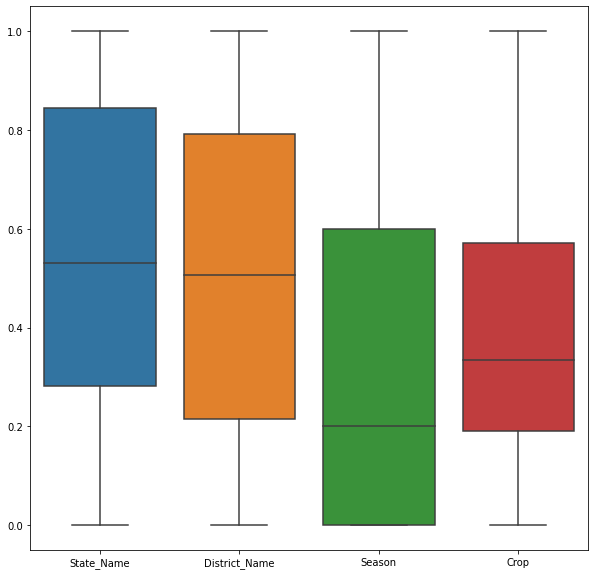

In [119]:
names=['State_Name','District_Name','Season','Crop']
bp=pd.DataFrame(data, columns=names)
dk,vk= plt.subplots()
dk.set_size_inches(10, 10)
sb.boxplot(data=bp)

## Normalizing 

In [128]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0.0,0.0,0.166667,0.2,0.000000,0.000014,0.000007
1,0.0,0.0,0.166667,0.2,0.023810,0.000078,0.000052
2,0.0,0.0,0.166667,0.2,0.047619,0.000633,0.000585
3,0.0,0.0,0.222222,0.2,0.000000,0.000014,0.000003
4,0.0,0.0,0.222222,0.2,0.023810,0.000173,0.000114
...,...,...,...,...,...,...,...
165516,1.0,1.0,0.944444,0.6,0.523810,0.025735,0.012686
165517,1.0,1.0,0.944444,0.8,0.166667,0.005155,0.007062
165518,1.0,1.0,0.944444,0.8,0.571429,0.009947,0.001603
165519,1.0,1.0,0.944444,0.2,0.000000,0.005139,0.056278


## Splitting Data

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_df.drop(columns=['Production']),scaled_df['Production']
                                               ,test_size=0.2,random_state=1)

In [130]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predict_knn=knn.predict(x_test)

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("KNN regression")
print("mean_absolute_error", mean_absolute_error(y_test, predict_knn))
print("mean_squared_error", mean_squared_error(y_test, predict_knn))

KNN regression
mean_absolute_error 0.01229445049020601
mean_squared_error 0.0017862656240789417


In [55]:
jb.dump(knn,"3054rfr.sav")

['3054rfr.sav']

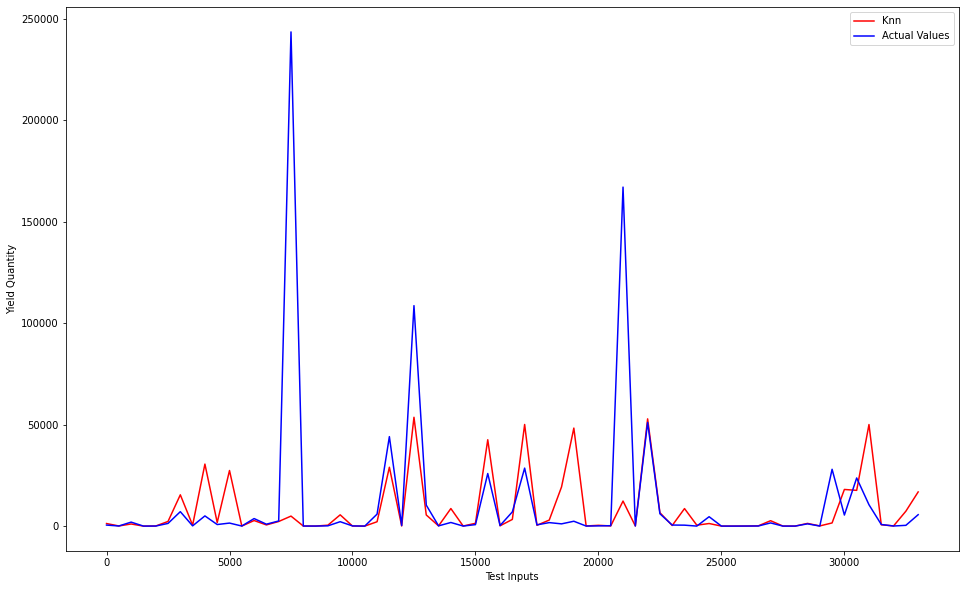

In [82]:
plt.figure(figsize = (16,10))
x = 500
plt.plot(list(range(len(y_test)))[::x],predict_knn[::x], label = "Knn", color = "r")
plt.plot(list(range(len(y_test)))[::x],y_test.values[::x], label = 'Actual Values', color ="b")
plt.xlabel('Test Inputs')
plt.ylabel('Yield Quantity')
plt.legend(loc='upper right')
plt.show()

In [120]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1
    features = ['constant'] + features 
    features_sframe=data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    output_sarray=data_sframe[output]
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [121]:
def get_numpy_testdata(data_sframe, features):
    data_sframe['constant'] = 1
    features = ['constant'] + features 
    features_sframe=data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    return (feature_matrix)

In [122]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    return (feature_matrix/norms,norms)

In [126]:
import turicreate as tc
data=tc.SFrame(data)
(training, test) = data.random_split(.8, seed=1)

In [127]:
data.column_names()

['State_Name',
 'District_Name',
 'Crop_Year',
 'Season',
 'Crop',
 'Area',
 'Production']

In [129]:
feature_list = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',]
features_train, output_train = get_numpy_data(training, feature_list, 'Production')
features_test, output_test = get_numpy_data(test, feature_list, 'Production')

In [130]:
features_train, norms = normalize_features(features_train) # normalize training set features (columns)
features_test = features_test / norms # normalize test set by training set norms

In [131]:
def distanceArr(featureM,query):
    return np.sqrt(np.sum((featureM-query)**2,axis=1))

def kNearestIndices(k,featureMatrix,query):
    kdist=distanceArr(featureMatrix,query)
    indx=np.argsort(kdist)
    return indx[0:k]

def knn(k,featureM,output,query):
    arrx=[]
    knni=kNearestIndices(k,featureM,query)
    arrx=output[knni]
    return sum(arrx)/k

def MultipleCropYields(k,featureM,output,n_querys):
    arr=[]
    for i in range(len(n_querys)):
        res=knn(k,featureM,output,n_querys[i])
        arr.append(res)
    return arr

In [137]:
rss_all=[]
for k in range(1,16):
    knnval=MultipleCropYields(k,features_train,output_train,features_test)
    knnval=sum((knnval-output_test)**2)
    rss_all.append(knnval) 
    
best_k=rss_all.index(min(rss_all))+1
print(best_k)

9


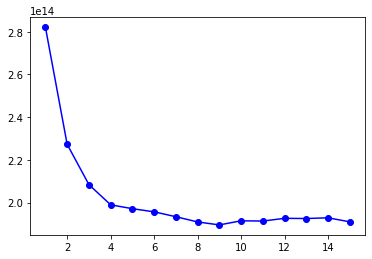

In [140]:
kvals = range(1, 16)
plt.plot(kvals, rss_all,'bo-')